In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/anuku/data science/Dataset/HR Dept.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


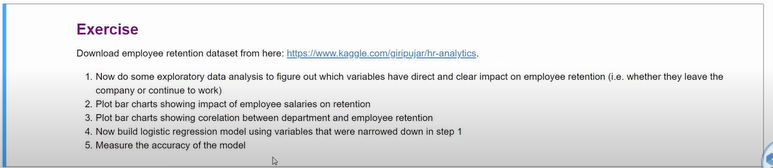

In [4]:
df.shape

(14999, 10)

In [5]:
left=df[df.left==1]
left.shape

(3571, 10)

In [6]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [9]:
#df.groupby('left').mean()

<Axes: xlabel='salary'>

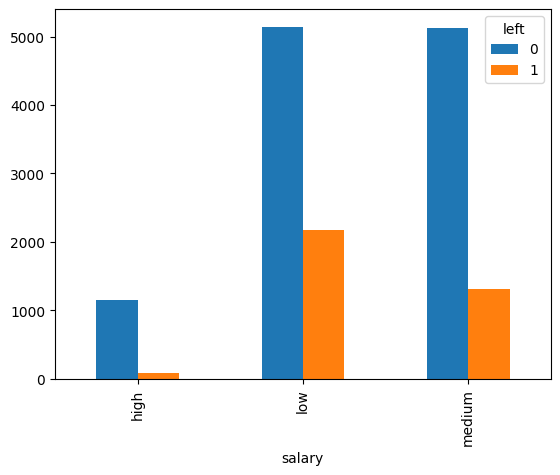

In [10]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [11]:
#department wise Employee retention rate

<Axes: xlabel='Department'>

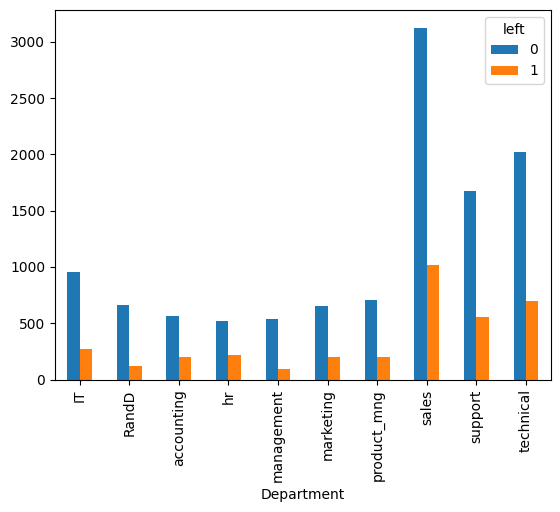

In [12]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [15]:
salary_dummies=pd.get_dummies(subdf.salary,prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [16]:
df_with_dummies=pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [17]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [18]:
x=df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [19]:
y=df.left

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=40)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
model.score(x_test,y_test)

0.7726666666666666